# Prueba de MODELOS

### IMPORTS

In [ ]:
!conda install -c conda-forge prophet

In [1]:
import warnings
warnings.filterwarnings('ignore')

import time
import threading


import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

from math import sqrt

import itertools
from itertools import product

from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

from scipy import stats

# from SciPy packages
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller # adfuller test
from statsmodels.graphics.tsaplots import plot_acf # autocorellation plot
from statsmodels.graphics.tsaplots import plot_pacf # partial autocorellation plot

from statsmodels.tsa.arima.model import ARIMA

import statsmodels.api as sm

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric






### CARGA DE COMPLETE RETURNS Y RENTALS

In [2]:
completeRentalsDf = pd.read_csv('completeRentalsDf.csv')
completeReturnsDf = pd.read_csv('completeReturnsDf.csv')
completeRentalsDf['Date'] = pd.to_datetime(completeRentalsDf['Date'])
completeReturnsDf['Date'] = pd.to_datetime(completeReturnsDf['Date'])

In [ ]:
completeRentalsDf.set_index('Date', inplace=True)
completeReturnsDf.set_index('Date', inplace=True)

In [4]:
completeRentalsDf.tail(10)

Date   0  31000  31001  31002  31003  31004  31005  \
99638 2022-01-31 14:00:00  10      0      0      0      0      0      0   
99639 2022-01-31 15:00:00  11      0      0      0      0      0      3   
99640 2022-01-31 16:00:00   6      0      0      1      0      1      1   
99641 2022-01-31 17:00:00   8      0      0      0      2      2      0   
99642 2022-01-31 18:00:00   9      0      0      0      0      2      1   
99643 2022-01-31 19:00:00   4      0      0      0      0      0      1   
99644 2022-01-31 20:00:00   2      0      0      0      0      0      0   
99645 2022-01-31 21:00:00   8      0      0      0      0      0      0   
99646 2022-01-31 22:00:00   3      0      0      0      0      0      0   
99647 2022-01-31 23:00:00   2      0      0      0      0      0      0   

       31006  31007  ...  32603  32604  32605  32606  32607  32608  32609  \
99638      0      1  ...      0      0      0      0      0      0      0   
99639      0      1  ...      0      1      0      0      0      0      0   
99640      1      0  ...      0      0      0      0      0      0      0   
99641      0      0  ...      0      0      0      0      0      0      0   
99642      1      0  ...      0      0      0      0      0      0      0   
99643      2      0  ...      0      0      0      0      0      0      0   
99644      1      0  ...      0      0      0      0      0      0      0   
99645      1      0  ...      0      0      0      0      0      0      0   
99646      0      0  ...      0      0      0      0      0      0      0   
99647      0      0  ...      0      0      0      0      0      0      0   

       32900  32901  32902  
99638      0      0      0  
99639      0      0      0  
99640      0      0      0  
99641      0      0      0  
99642      0      0      0  
99643      0      0      0  
99644      0      0      0  
99645      0      0      0  
99646      0      0      0  
99647      0      0      0  

[10 rows x 681 columns]

In [5]:
completeReturnsDf.tail(10)

Date   0  31000  31001  31002  31003  31004  31005  \
99638 2022-01-31 14:00:00   7      0      0      0      0      0      0   
99639 2022-01-31 15:00:00  12      0      0      1      1      1      0   
99640 2022-01-31 16:00:00  11      1      0      1      0      1      0   
99641 2022-01-31 17:00:00   9      0      0      1      1      1      0   
99642 2022-01-31 18:00:00   9      0      0      0      0      0      1   
99643 2022-01-31 19:00:00  12      0      0      0      0      1      0   
99644 2022-01-31 20:00:00   5      0      0      0      0      0      0   
99645 2022-01-31 21:00:00   6      0      0      0      0      0      0   
99646 2022-01-31 22:00:00   5      0      0      0      0      0      0   
99647 2022-01-31 23:00:00   2      0      0      0      0      0      0   

       31006  31007  ...  32603  32604  32605  32606  32607  32608  32609  \
99638      1      1  ...      0      0      0      0      0      0      0   
99639      1      1  ...      0      0      0      1      0      0      0   
99640      0      0  ...      0      0      0      0      0      0      0   
99641      0      0  ...      0      0      0      0      0      0      0   
99642      1      0  ...      0      1      0      0      0      0      0   
99643      1      0  ...      0      0      0      0      0      0      0   
99644      0      0  ...      0      0      0      0      0      0      0   
99645      1      1  ...      0      0      0      0      0      0      0   
99646      0      0  ...      0      0      0      0      0      0      0   
99647      0      0  ...      0      0      0      0      0      0      0   

       32900  32901  32902  
99638      0      0      0  
99639      0      0      0  
99640      0      0      0  
99641      0      0      0  
99642      0      0      0  
99643      0      0      0  
99644      0      0      0  
99645      0      0      0  
99646      0      0      0  
99647      0      0      0  

[10 rows x 681 columns]

### MIN MAX NORMALIZATION

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()

completeReturnsDf = pd.DataFrame(min_max_scaler.fit_transform(completeReturnsDf), columns=completeReturnsDf.columns, index=completeReturnsDf.index)
completeRentalsDf = pd.DataFrame(min_max_scaler.fit_transform(completeRentalsDf), columns=completeRentalsDf.columns, index=completeRentalsDf.index)

In [8]:
completeReturnsDf.tail(10)

0     31000  31001     31002     31003     31004  \
Date                                                                           
2021-11-30 14:00:00  0.236364  0.000000    0.0  0.000000  0.000000  0.000000   
2021-11-30 15:00:00  0.218182  0.000000    0.0  0.000000  0.000000  0.000000   
2021-11-30 16:00:00  0.345455  0.000000    0.0  0.000000  0.000000  0.000000   
2021-11-30 17:00:00  0.400000  0.083333    0.0  0.071429  0.166667  0.000000   
2021-11-30 18:00:00  0.272727  0.000000    0.0  0.071429  0.166667  0.111111   
2021-11-30 19:00:00  0.327273  0.000000    0.0  0.000000  0.000000  0.222222   
2021-11-30 20:00:00  0.163636  0.000000    0.0  0.071429  0.083333  0.000000   
2021-11-30 21:00:00  0.181818  0.000000    0.0  0.000000  0.000000  0.000000   
2021-11-30 22:00:00  0.090909  0.000000    0.0  0.000000  0.000000  0.111111   
2021-11-30 23:00:00  0.072727  0.000000    0.0  0.000000  0.000000  0.000000   

                        31005     31006     31007  31008  ...  32603  32604  \
Date                                                      ...                 
2021-11-30 14:00:00  0.066667  0.000000  0.000000    0.0  ...    0.0    0.0   
2021-11-30 15:00:00  0.000000  0.000000  0.055556    0.0  ...    0.0    0.0   
2021-11-30 16:00:00  0.066667  0.083333  0.000000    0.0  ...    0.0    0.0   
2021-11-30 17:00:00  0.066667  0.000000  0.055556    0.0  ...    0.0    0.0   
2021-11-30 18:00:00  0.066667  0.083333  0.000000    0.0  ...    0.0    0.0   
2021-11-30 19:00:00  0.066667  0.166667  0.111111    0.0  ...    0.0    0.0   
2021-11-30 20:00:00  0.133333  0.083333  0.000000    0.0  ...    0.0    0.0   
2021-11-30 21:00:00  0.000000  0.000000  0.055556    0.0  ...    0.0    0.0   
2021-11-30 22:00:00  0.000000  0.166667  0.000000    0.0  ...    0.0    0.0   
2021-11-30 23:00:00  0.000000  0.000000  0.000000    0.0  ...    0.0    0.0   

                     32605  32606  32607  32608  32609  32900  32901  32902  
Date                                                                         
2021-11-30 14:00:00   0.00    0.0   0.00    0.0    0.0    0.0    0.0    0.0  
2021-11-30 15:00:00   0.00    0.0   0.25    0.0    0.0    0.0    0.0    0.0  
2021-11-30 16:00:00   0.00    0.0   0.00    0.0    0.0    0.0    0.0    0.0  
2021-11-30 17:00:00   0.00    0.0   0.00    0.0    0.0    0.0    0.0    0.0  
2021-11-30 18:00:00   0.25    0.0   0.00    0.0    0.0    0.0    0.0    0.0  
2021-11-30 19:00:00   0.00    0.0   0.00    0.0    0.0    0.0    0.0    0.0  
2021-11-30 20:00:00   0.00    0.0   0.00    0.0    0.0    0.0    0.0    0.0  
2021-11-30 21:00:00   0.00    0.0   0.00    0.0    0.0    0.0    0.0    0.0  
2021-11-30 22:00:00   0.00    0.0   0.00    0.0    0.0    0.0    0.0    0.0  
2021-11-30 23:00:00   0.00    0.0   0.00    0.0    0.0    0.0    0.0    0.0  

[10 rows x 680 columns]

In [9]:
completeRentalsDf.tail(10)

0  31000  31001     31002     31003  31004  \
Date                                                                     
2021-11-30 14:00:00  0.232558    0.0    0.0  0.000000  0.000000  0.125   
2021-11-30 15:00:00  0.186047    0.0    0.0  0.000000  0.000000  0.000   
2021-11-30 16:00:00  0.302326    0.0    0.0  0.058824  0.000000  0.000   
2021-11-30 17:00:00  0.395349    0.0    0.0  0.058824  0.166667  0.250   
2021-11-30 18:00:00  0.302326    0.0    0.0  0.000000  0.250000  0.125   
2021-11-30 19:00:00  0.139535    0.0    0.0  0.000000  0.000000  0.125   
2021-11-30 20:00:00  0.139535    0.0    0.0  0.058824  0.000000  0.000   
2021-11-30 21:00:00  0.209302    0.0    0.0  0.058824  0.000000  0.000   
2021-11-30 22:00:00  0.162791    0.0    0.0  0.000000  0.000000  0.000   
2021-11-30 23:00:00  0.069767    0.0    0.0  0.000000  0.000000  0.000   

                        31005   31006     31007  31008  ...  32603  32604  \
Date                                                    ...                 
2021-11-30 14:00:00  0.000000  0.0000  0.000000    0.0  ...    0.0    0.0   
2021-11-30 15:00:00  0.000000  0.0000  0.000000    0.0  ...    0.0    0.0   
2021-11-30 16:00:00  0.176471  0.0000  0.043478    0.0  ...    0.0    0.0   
2021-11-30 17:00:00  0.235294  0.0000  0.130435    0.0  ...    0.0    0.0   
2021-11-30 18:00:00  0.117647  0.0625  0.043478    0.0  ...    0.0    0.0   
2021-11-30 19:00:00  0.000000  0.0625  0.043478    0.0  ...    0.0    0.0   
2021-11-30 20:00:00  0.058824  0.1250  0.000000    0.0  ...    0.0    0.0   
2021-11-30 21:00:00  0.000000  0.0000  0.000000    0.0  ...    0.0    0.0   
2021-11-30 22:00:00  0.058824  0.0000  0.043478    0.0  ...    0.0    0.0   
2021-11-30 23:00:00  0.000000  0.0000  0.000000    0.0  ...    0.0    0.0   

                     32605  32606  32607  32608  32609  32900  32901  32902  
Date                                                                         
2021-11-30 14:00:00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2021-11-30 15:00:00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2021-11-30 16:00:00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2021-11-30 17:00:00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2021-11-30 18:00:00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2021-11-30 19:00:00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2021-11-30 20:00:00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2021-11-30 21:00:00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2021-11-30 22:00:00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2021-11-30 23:00:00    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[10 rows x 680 columns]

### DECOMPOSITIONS

#### - Rentals 

In [34]:
additive_decomposition_rentals = seasonal_decompose(completeRentalsDf['31005'], model='additive', period=3600)

Text(0.5, 0.98, 'Additive Decomposition Returns')

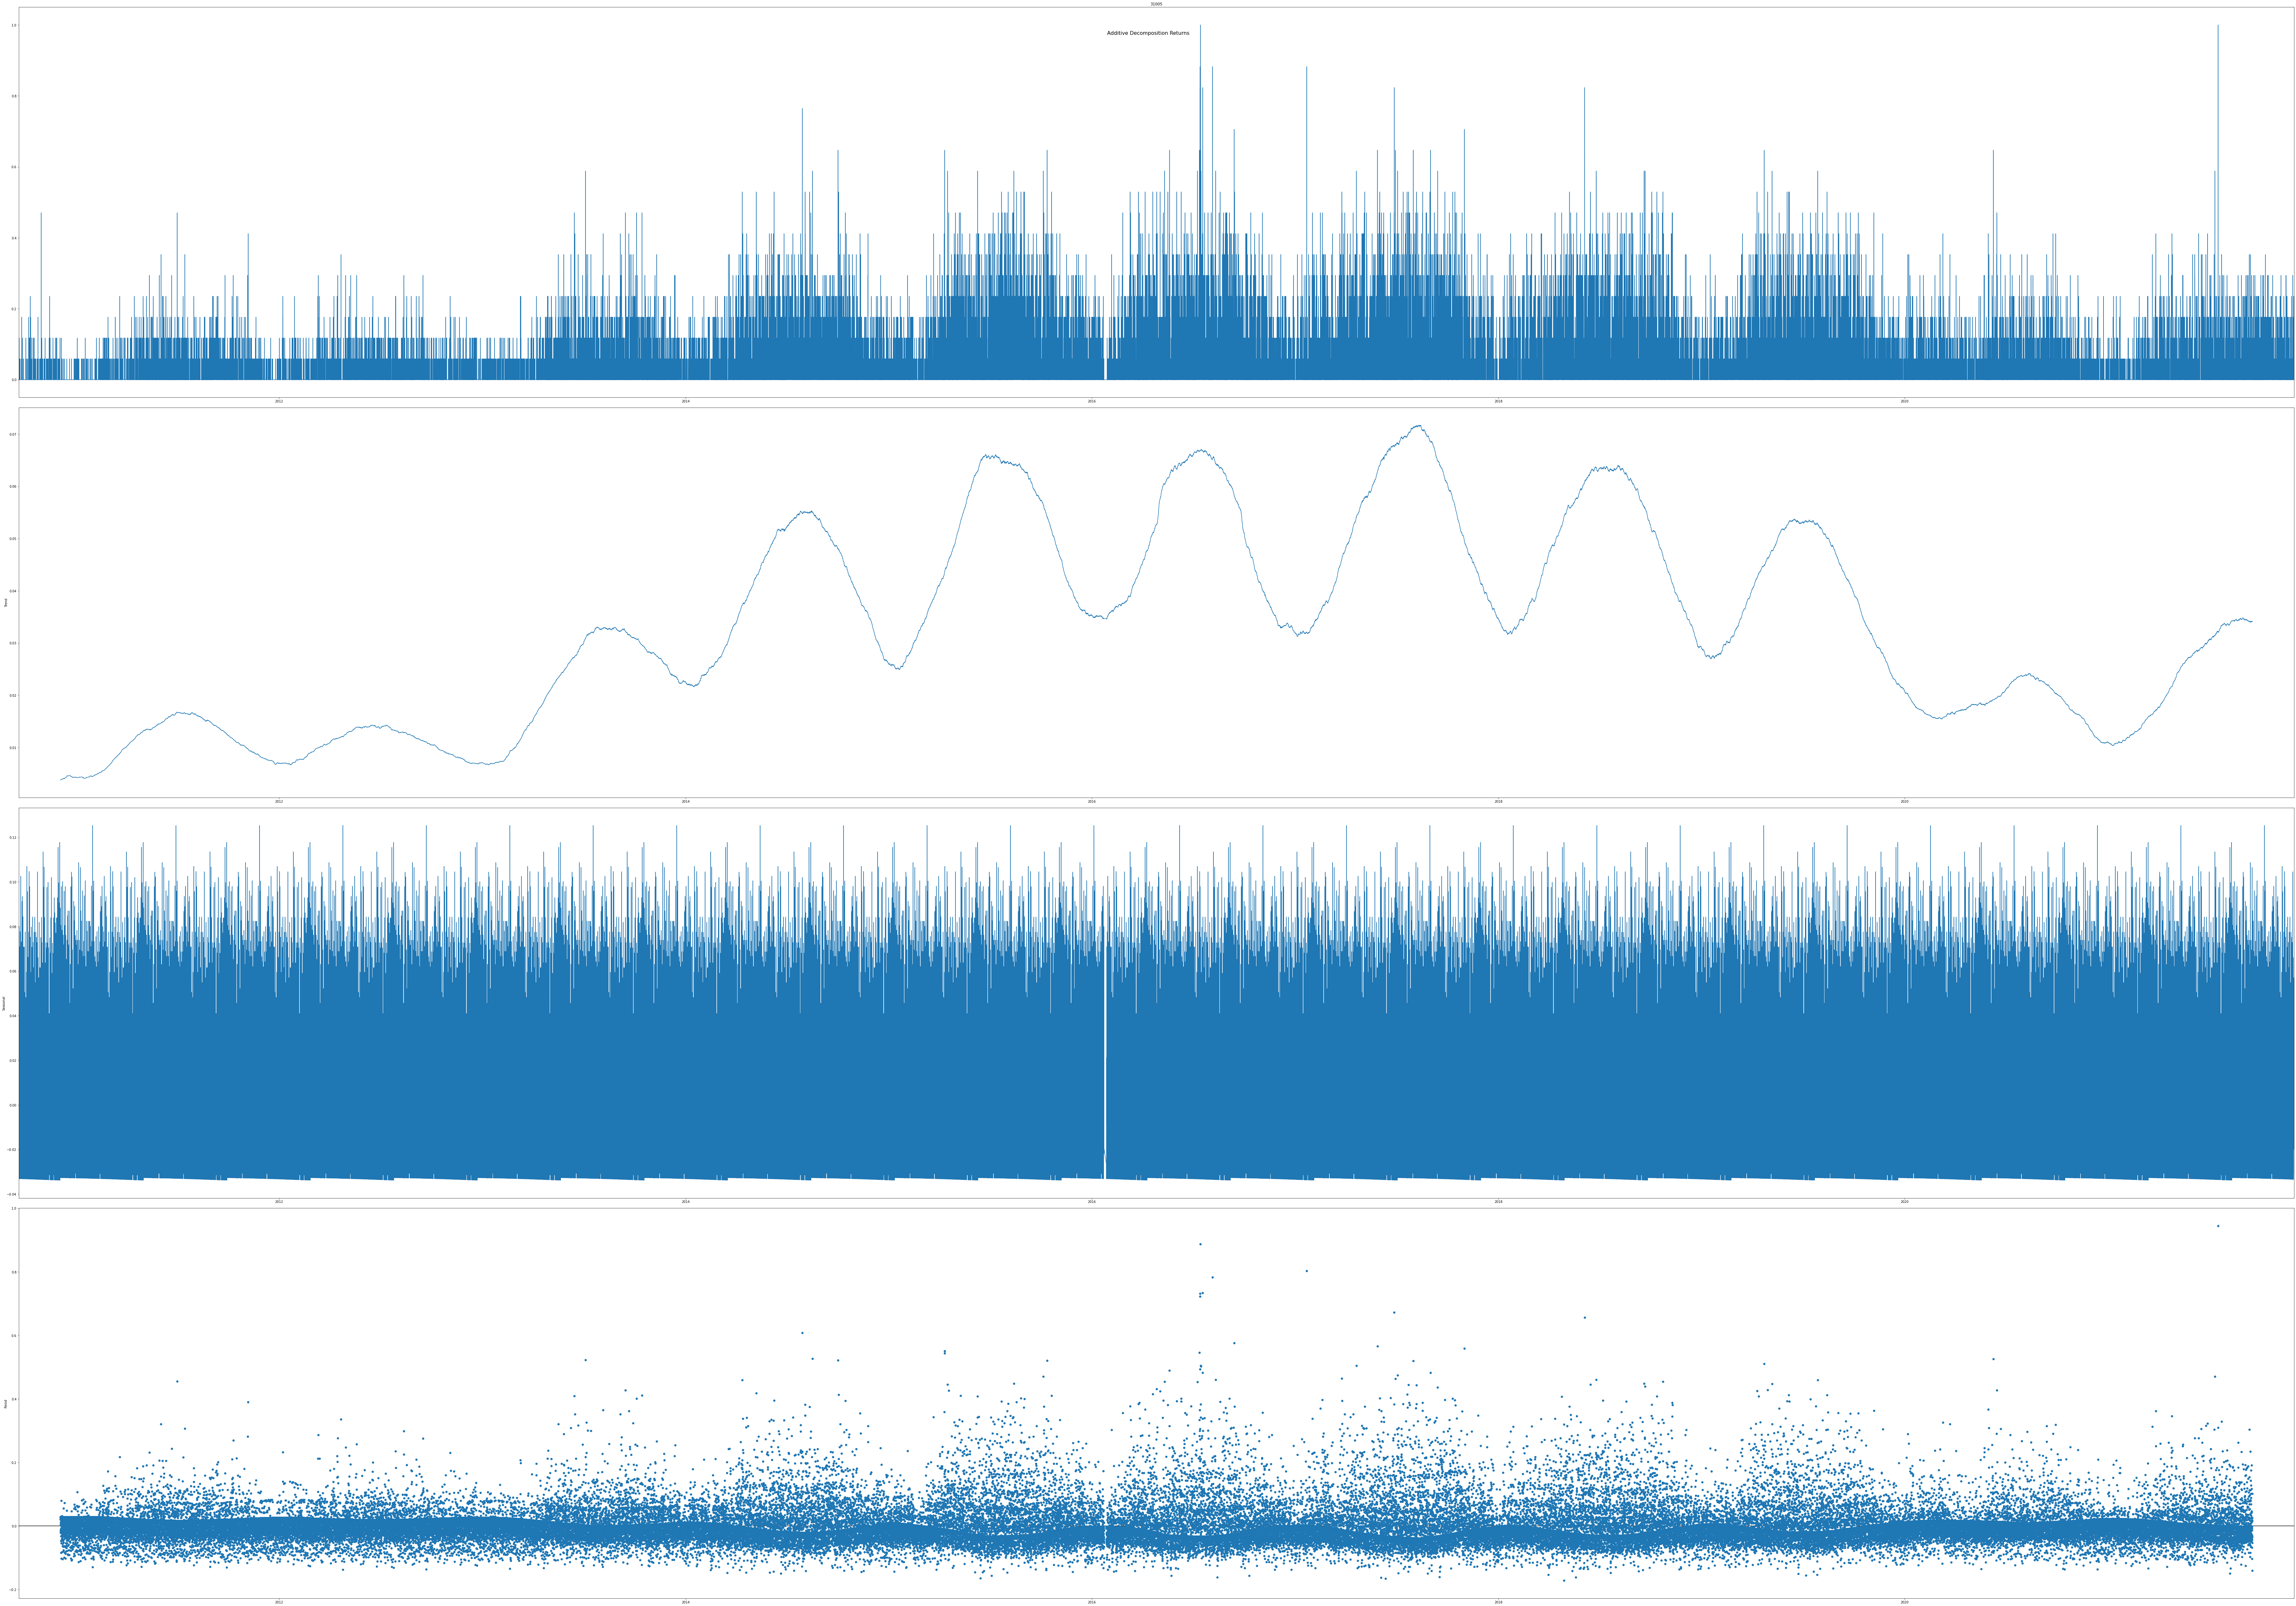

In [35]:
plt.rcParams["figure.figsize"] = (100,70)
additive_decomposition_rentals.plot().suptitle('Additive Decomposition Returns', fontsize=16)


#### -Returns

In [36]:
additive_decomposition_returns = seasonal_decompose(completeReturnsDf['31005'], model='additive', period=3600)

Text(0.5, 0.98, 'Additive Decomposition Rentals')

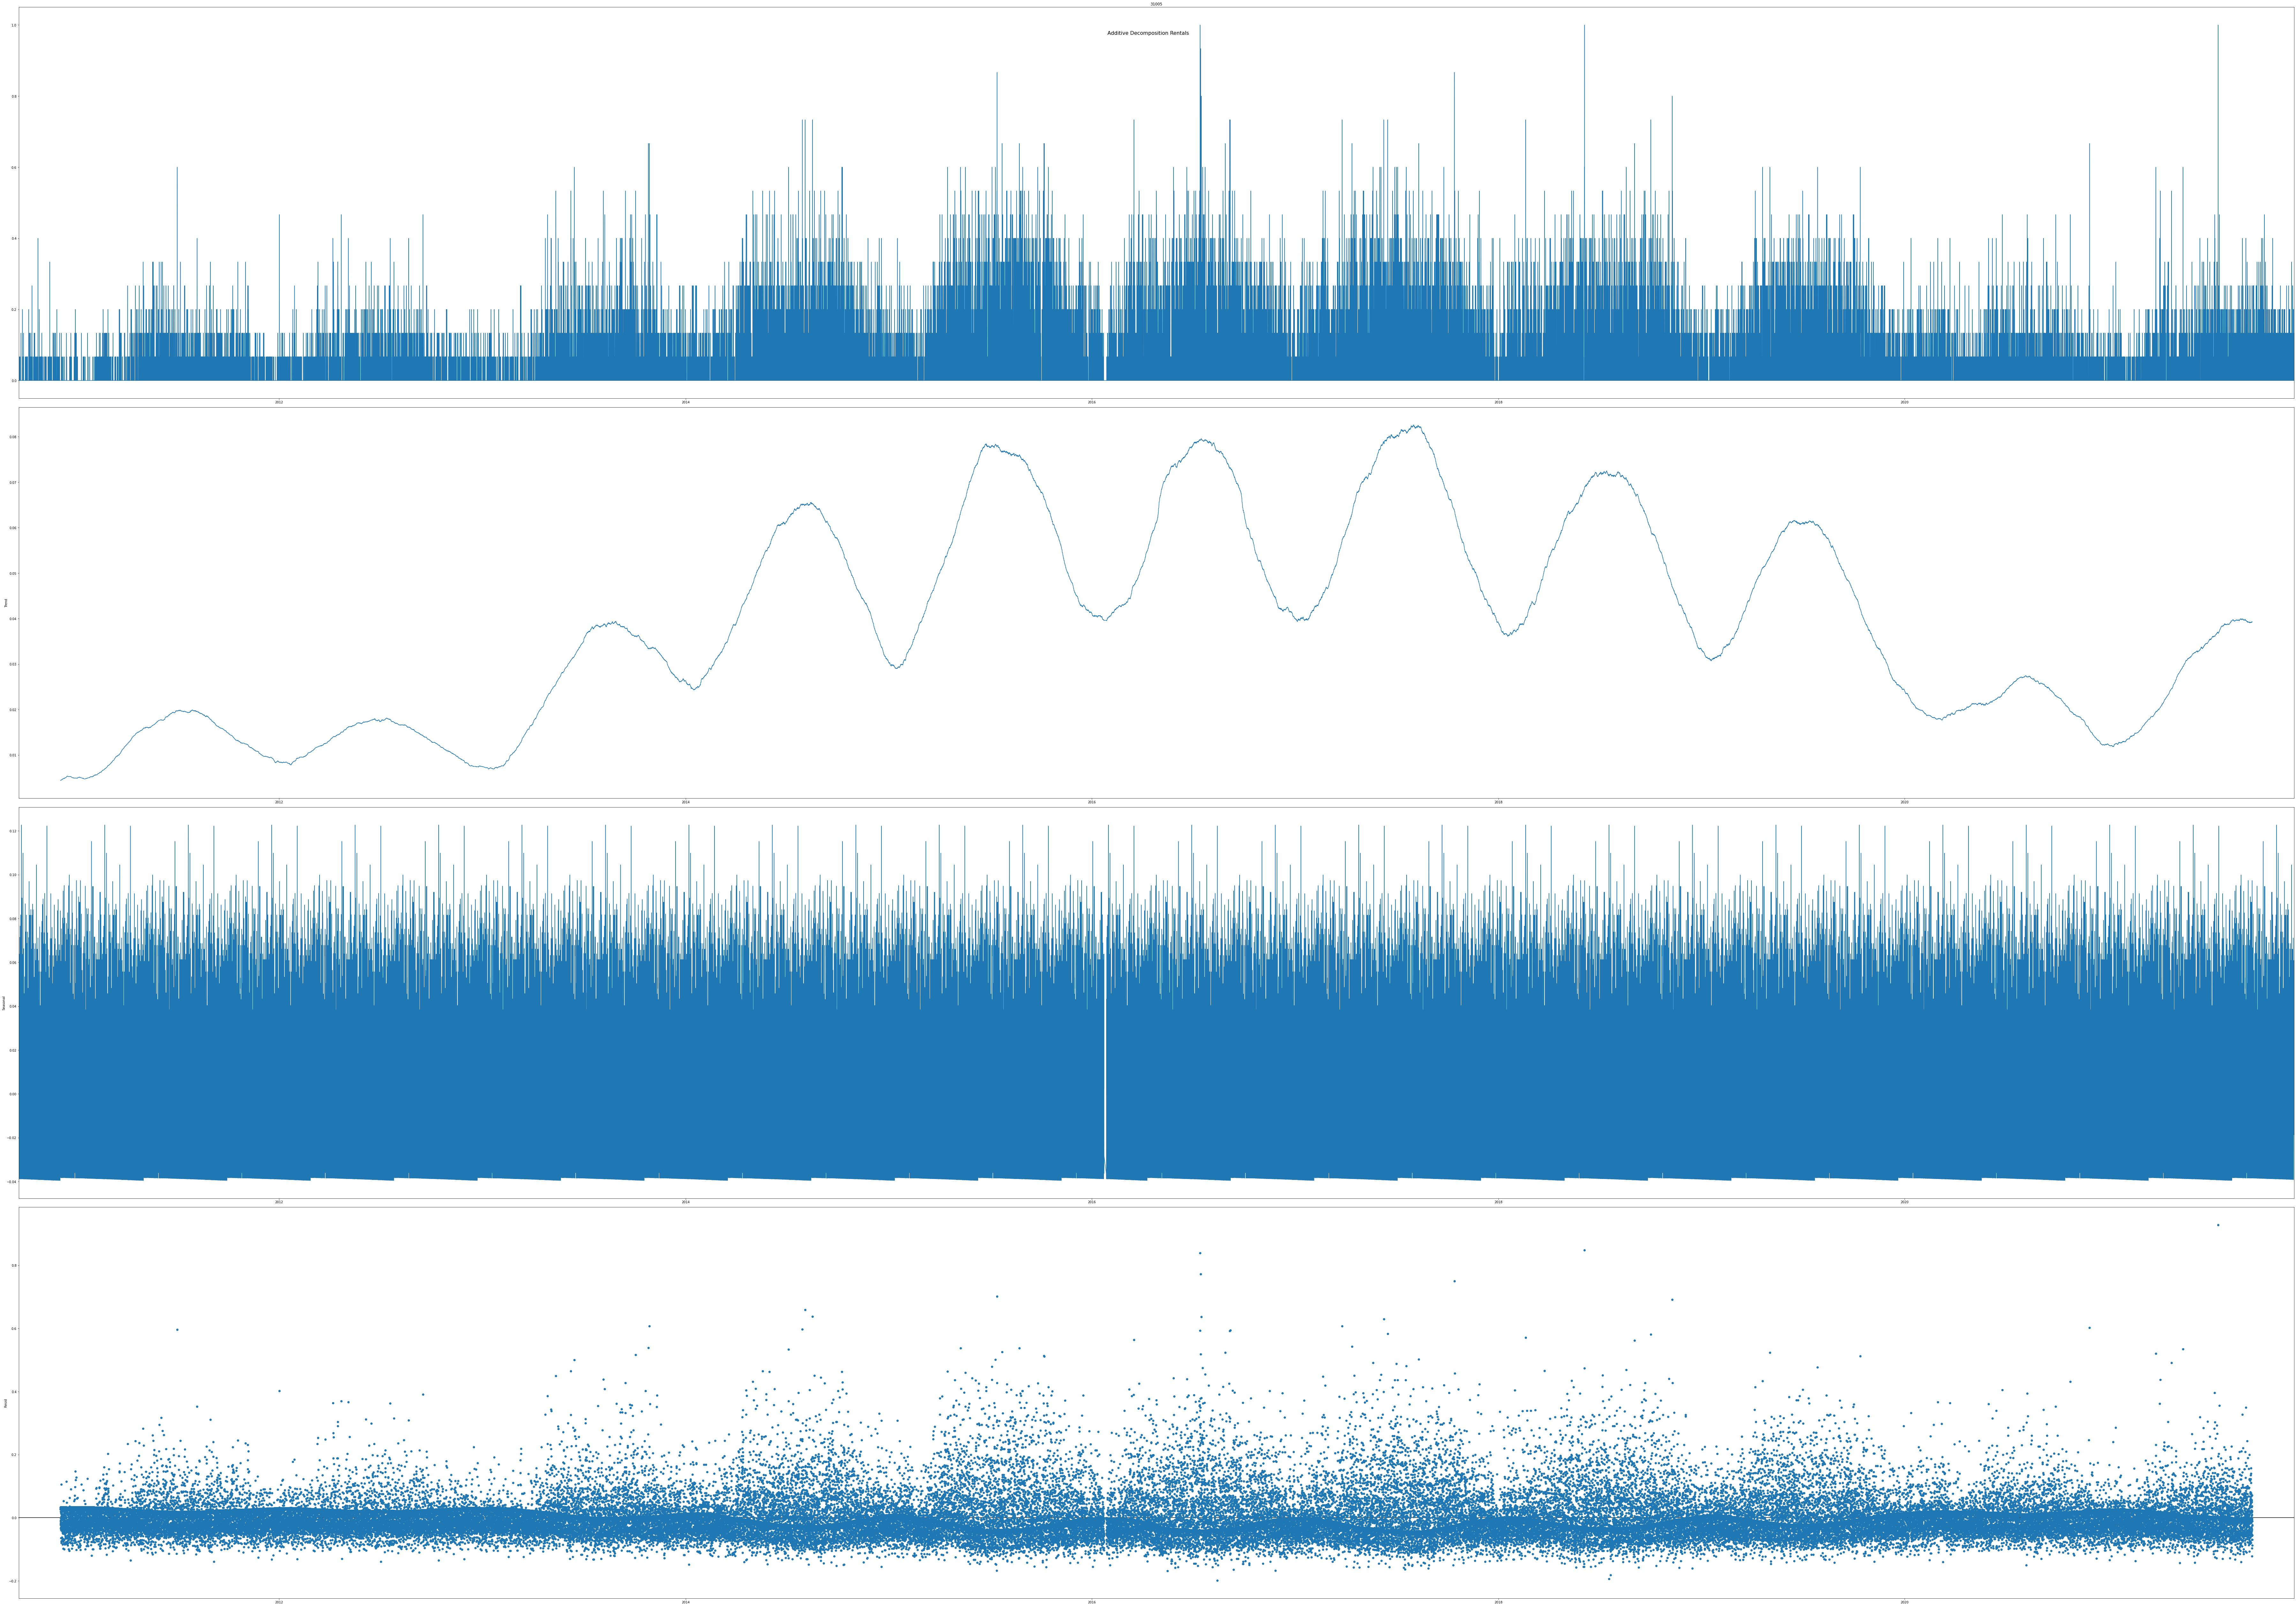

In [37]:
additive_decomposition_returns.plot().suptitle('Additive Decomposition Rentals', fontsize=16)

### ACF Y PACF

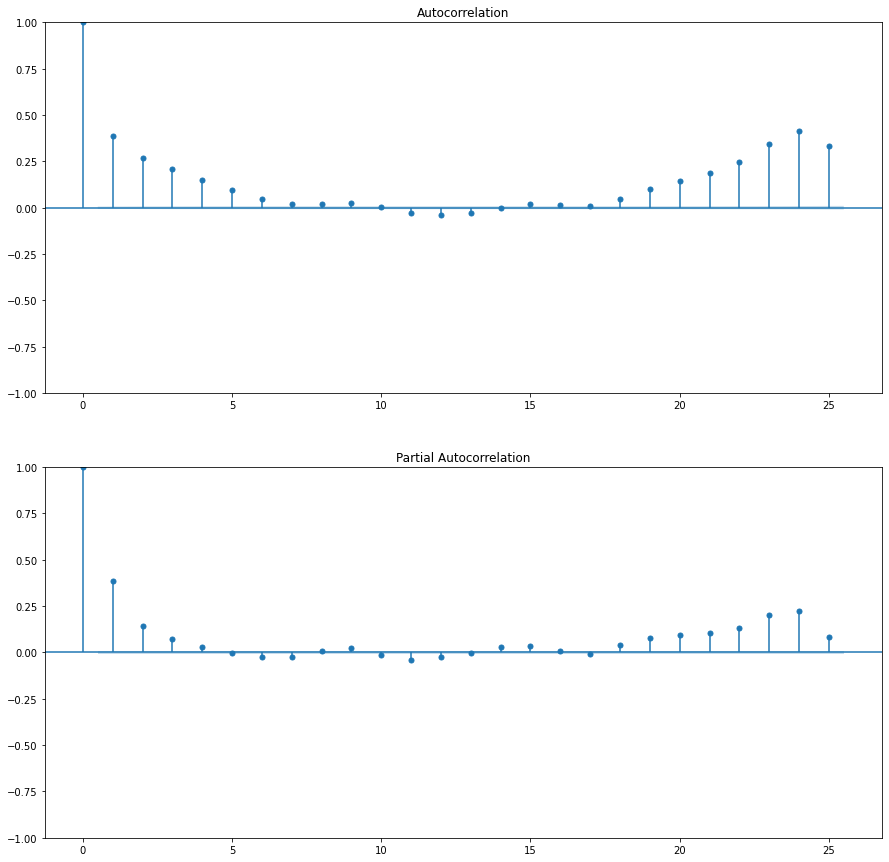

In [38]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize = (15,15))
plot_acf(completeRentalsDf['31005'], lags =25, ax = ax1)
plot_pacf(completeRentalsDf['31005'], lags =25, ax = ax2)
plt.show()

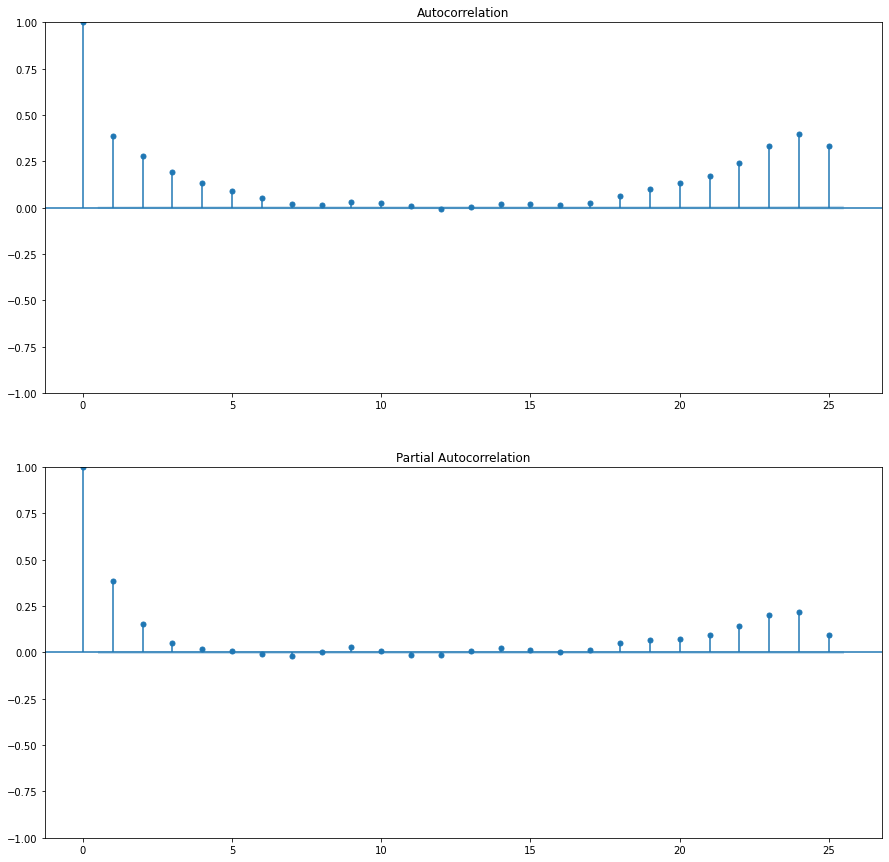

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize = (15,15))
plot_acf(completeReturnsDf['31005'], lags =25, ax = ax1)
plot_pacf(completeReturnsDf['31005'], lags =25, ax = ax2)
plt.show()

### AUGMENTED DICKEY-FULLER TEST

In [10]:
result = adfuller(completeRentalsDf['31005'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.105154
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [11]:
result = adfuller(completeReturnsDf['31005'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.257561
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


### ARIMA

In [13]:
X = completeRentalsDf['31005']
size = int(len(X) * 0.9995)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
print(history[1])

0.0


In [88]:
predictions = list()
print(len(test))
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

50
predicted=0.014559, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=-0.000000, expected=0.000000
predicted=0.000000, expected=0.117647
predicted=0.058263, expected=0.000000
predicted=0.030266, expected=0.000000
predicted=0.029120, expected=0.000000
predicted=-0.000000, expected=0.117647
predicted=0.058262, expected=0.058824
predicted=0.059397, expected=0.000000
predicted=0.044253, expected=0.058824
predicted=0.043692, expected=0.117647
predicted=0.073394, expected=0.176471
predicted=0.132220, expected=0.000000
predicted=0.074516, expected=0.058824
predicted=0.072815, expected=0.000000
predicted=0.015132, expected=0.000000
p

In [ ]:
plt.rcParams["figure.figsize"] = (20,14)
plt.plot(test.values)
plt.plot(predictions, color='red')
plt.show()

### SARIMAX

In [14]:
ps = range(0, 3)
d = 1
qs = range(0, 3)
Ps = 0
D = 0
Qs = 0

In [15]:
parameters = product(ps, qs)#, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

9

In [16]:
%%time
results = []
best_aic = float("inf")

warnings.filterwarnings('ignore')

for i,param in enumerate(parameters_list):
    print(i)
    try:
        model= sm.tsa.statespace.SARIMAX(history, order=(param[0], d, param[1]), 
                                        seasonal_order=(Ps, D, 
                                                        Qs, 168)).fit(disp=False)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    # save best model, it's AIC and params
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

0
1
2
3
4
5
6
7
8
Wall time: 1min 40s


In [17]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters            aic
5     (1, 2) -272925.270714
7     (2, 1) -272827.055951
8     (2, 2) -271947.867164
4     (1, 1) -271837.380139
2     (0, 2) -269603.487037


In [18]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                98014
Model:               SARIMAX(1, 1, 2)   Log Likelihood              136466.635
Date:                Wed, 02 Feb 2022   AIC                        -272925.271
Time:                        19:58:20   BIC                        -272887.299
Sample:                             0   HQIC                       -272913.737
                              - 98014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5908      0.005    111.468      0.000       0.580       0.601
ma.L1         -1.2970      0.006   -217.743      0.000      -1.309      -1.285
ma.L2          0.2990      0.006     50.540      0.0

Student's criterion: p=0.792658
Dickey-Fuller criterion: p=0.000000


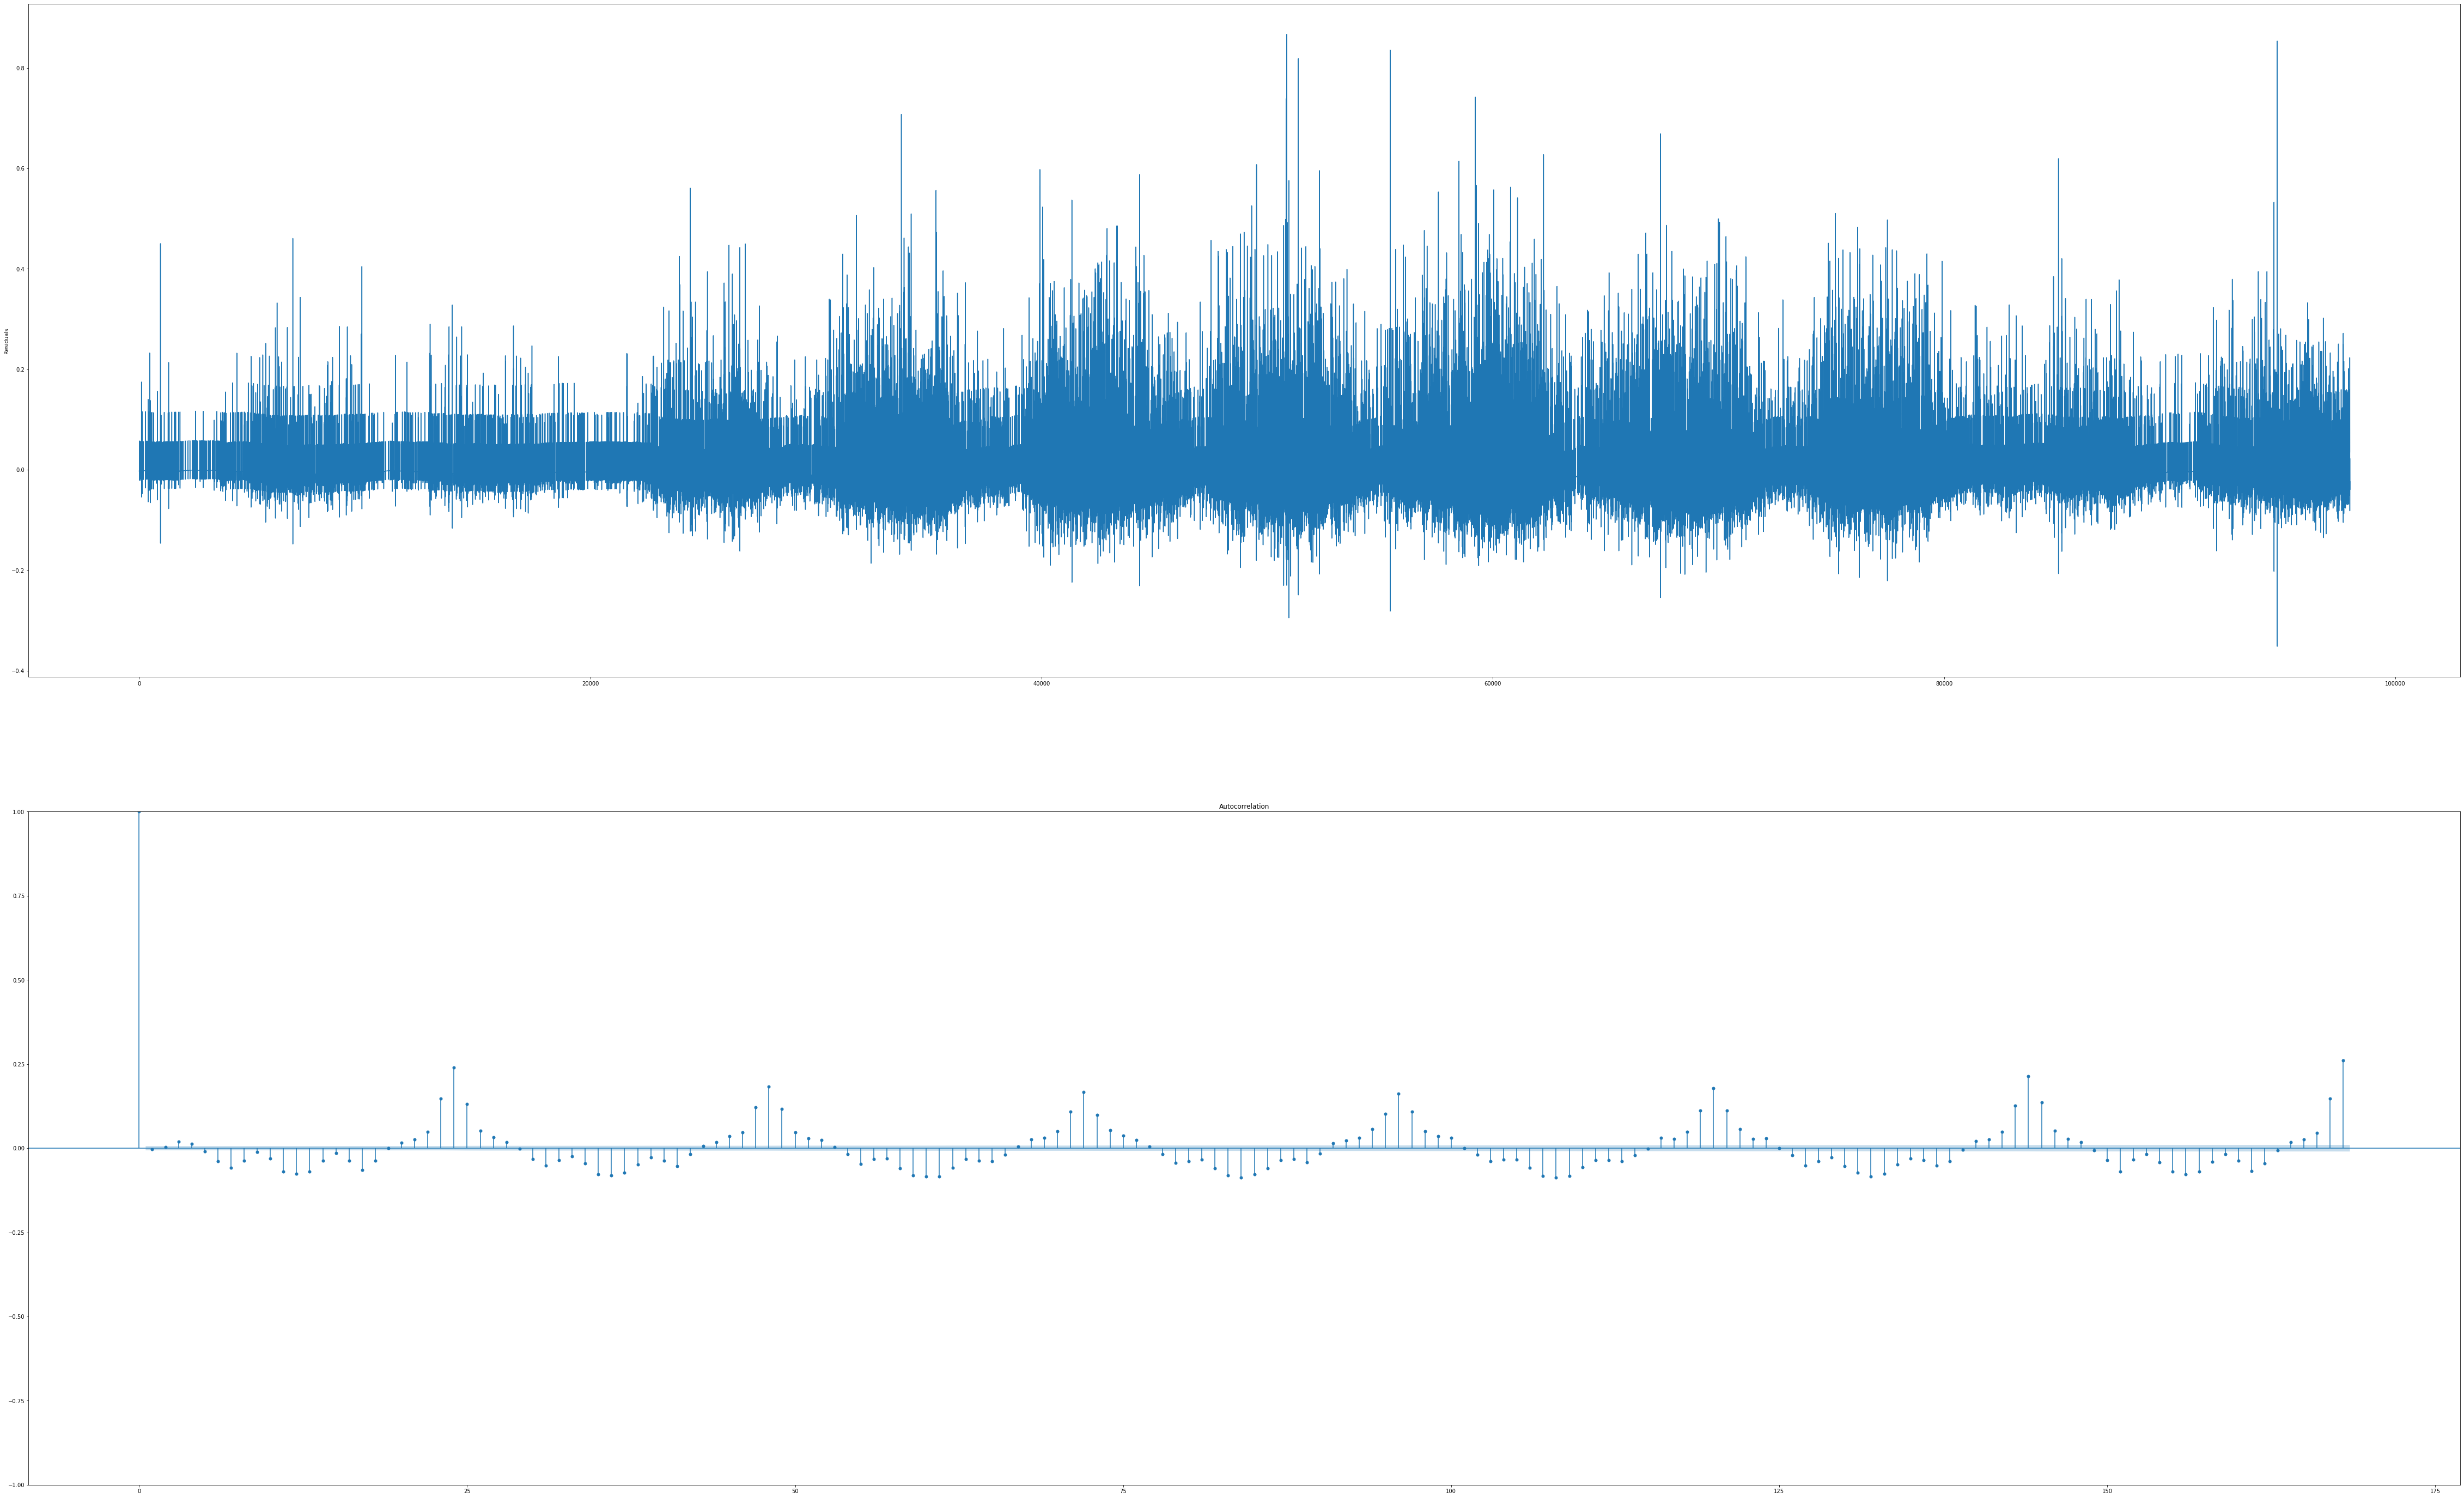

In [19]:
plt.rcParams["figure.figsize"] = (80,50)
plt.subplot(211)
residuals = pd.Series(best_model.resid[25:])
residuals.plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(residuals.values.squeeze(), lags=168, ax=ax)

print("Student's criterion: p=%f" % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print("Dickey-Fuller criterion: p=%f" % sm.tsa.stattools.adfuller(residuals)[1])

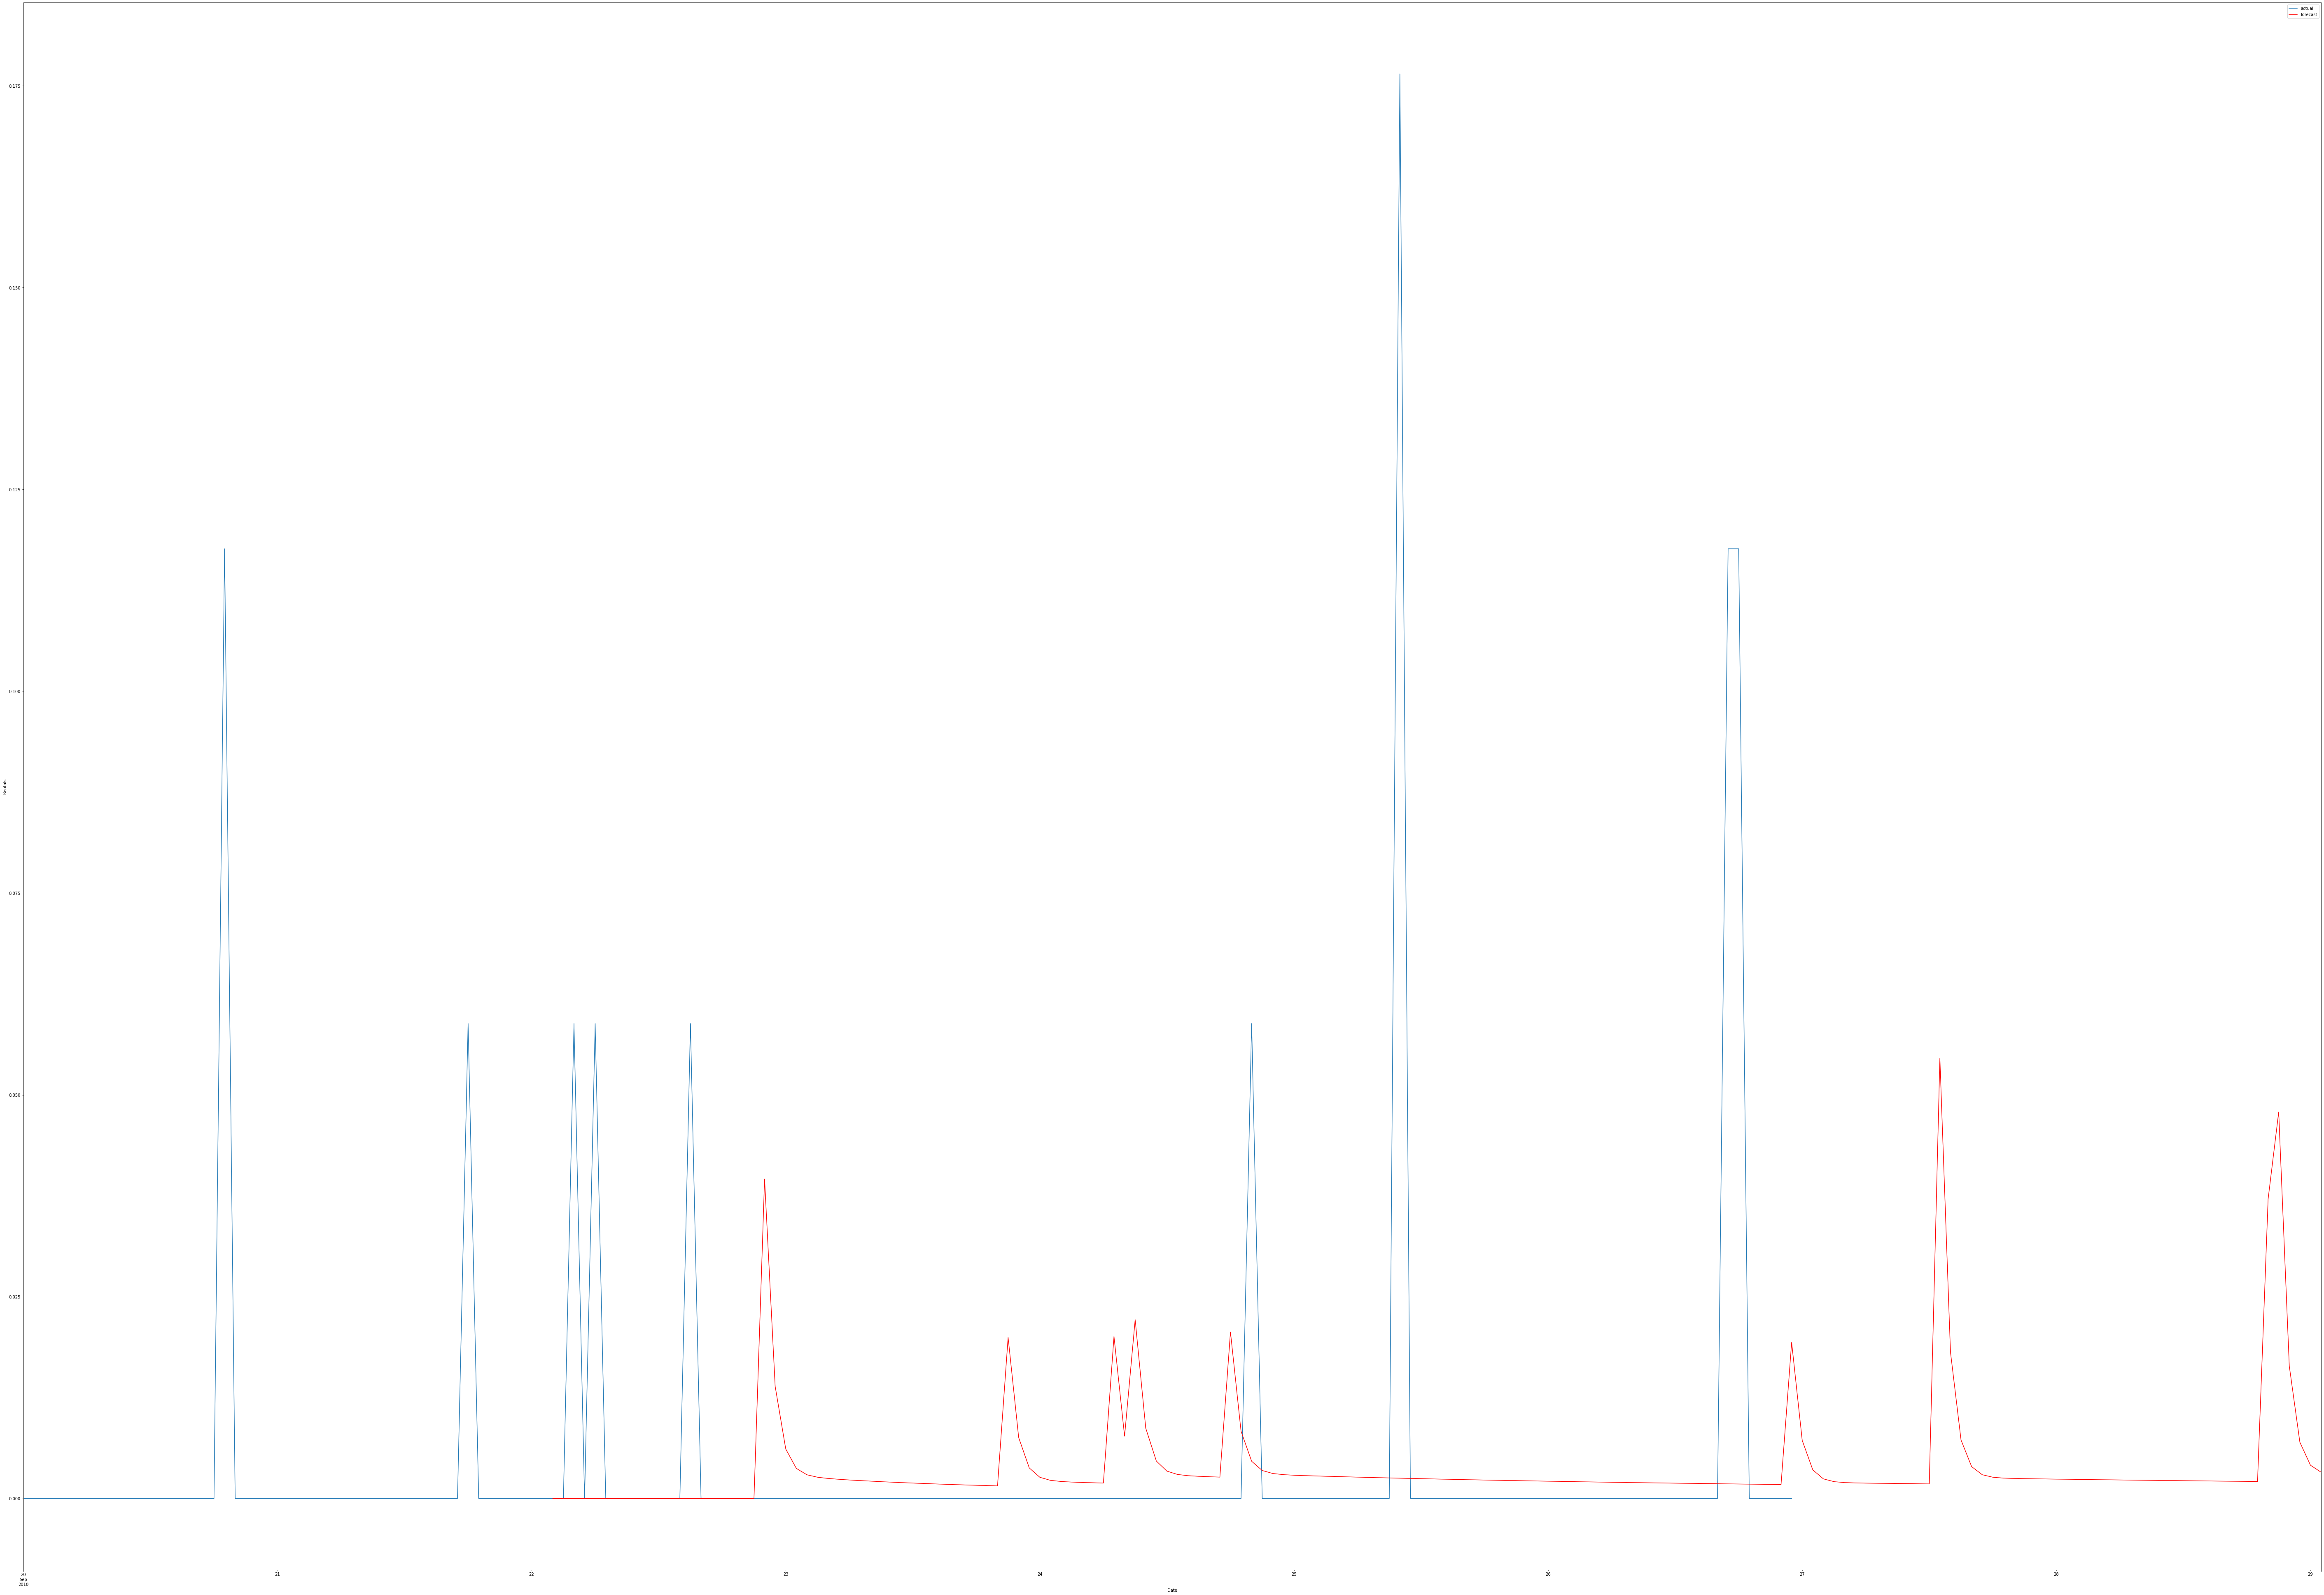

In [20]:
plt.figure(figsize=(100, 70))
df_indices_list = completeRentalsDf.index.values
df_model = pd.DataFrame()
df_model.index = df_indices_list[50:]
df_model['fitted_values'] = best_model.fittedvalues
completeRentalsDf['31005'][:168].plot(label='actual')
df_model['fitted_values'][:168].plot(color='r', label='forecast')
plt.ylabel('Rentals')
plt.legend();

                        31005
Date                         
2021-11-30 14:00:00  0.000000
2021-11-30 15:00:00  0.000000
2021-11-30 16:00:00  0.176471
2021-11-30 17:00:00  0.235294
2021-11-30 18:00:00  0.117647
2021-11-30 19:00:00  0.000000
2021-11-30 20:00:00  0.058824
2021-11-30 21:00:00  0.000000
2021-11-30 22:00:00  0.058824
2021-11-30 23:00:00  0.000000
[datetime.datetime(2021, 12, 1, 0, 0), datetime.datetime(2021, 12, 1, 1, 0), datetime.datetime(2021, 12, 1, 2, 0), datetime.datetime(2021, 12, 1, 3, 0), datetime.datetime(2021, 12, 1, 4, 0), datetime.datetime(2021, 12, 1, 5, 0), datetime.datetime(2021, 12, 1, 6, 0), datetime.datetime(2021, 12, 1, 7, 0), datetime.datetime(2021, 12, 1, 8, 0), datetime.datetime(2021, 12, 1, 9, 0), datetime.datetime(2021, 12, 1, 10, 0), datetime.datetime(2021, 12, 1, 11, 0), datetime.datetime(2021, 12, 1, 12, 0), datetime.datetime(2021, 12, 1, 13, 0), datetime.datetime(2021, 12, 1, 14, 0), datetime.datetime(2021, 12, 1, 15, 0), datetime.datetime(2021, 1

C:\Users\User\AppData\Local\Temp/ipykernel_26800/2307329846.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  date_list = [pd.datetime.strptime("2021-12-01", "%Y-%m-%d") + relativedelta(hours=x) for x in range(0,24)]


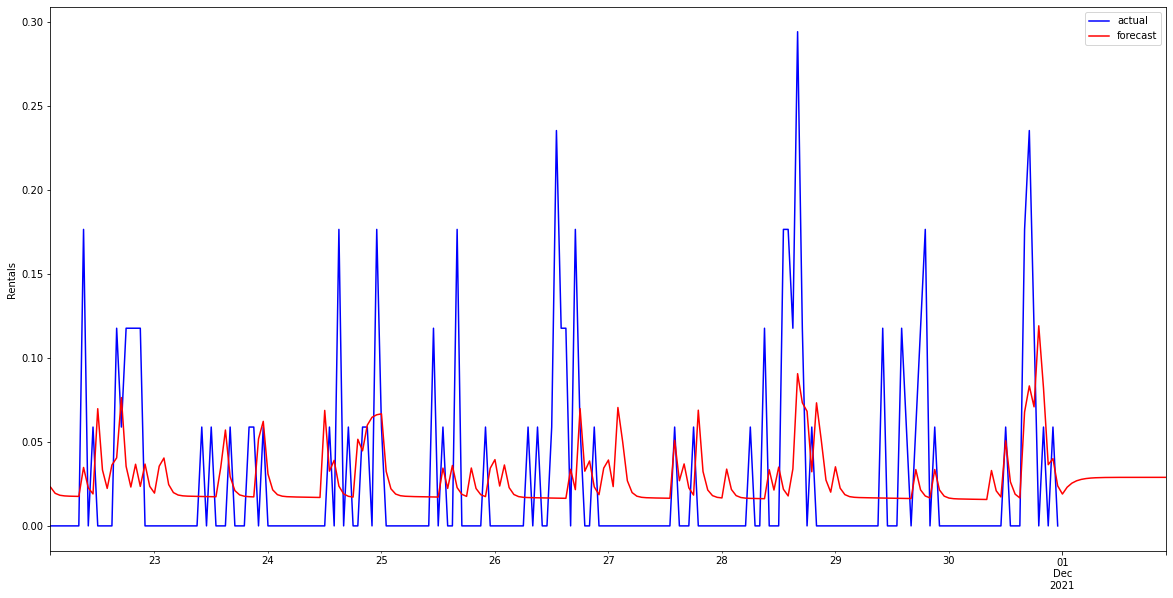

In [21]:
from dateutil.relativedelta import relativedelta

plt.figure(figsize=(20, 10))
completeRentalsDf2 = completeRentalsDf[['31005']]
completeRentalsDf2 = completeRentalsDf2.iloc[50:98064]  
print(completeRentalsDf2.tail(10))
date_list = [pd.datetime.strptime("2021-12-01", "%Y-%m-%d") + relativedelta(hours=x) for x in range(0,24)]
print(date_list)
future = pd.DataFrame(index=date_list, columns=completeRentalsDf2.columns)
completeRentalsDf2 = pd.concat([completeRentalsDf2, future])
completeRentalsDf2['forecast'] = best_model.predict(start = 0, end= 98037)
print(best_model.params)
print(completeRentalsDf2['forecast'])

completeRentalsDf2['31005'][97800:98014].plot(color='b', label='actual')
completeRentalsDf2['forecast'][97800:98037].plot(color='r', label='forecast')
plt.ylabel('Rentals')
plt.legend();

In [22]:
best_model.plot_predict(1,20)
x = best_model.forecast(steps=120)

AttributeError: 'SARIMAXResults' object has no attribute 'plot_predict'

### CARGA DE LOS DATOS METEOROLOGICOS

In [3]:
dfWeather = pd.read_csv('completeWeatherDf.csv')
dfWeather.shape

(99648, 20)

### TRAIN-TEST SPLIT

In [4]:
DAYS = 31
STATION = '31005'
df_train = completeRentalsDf.filter(['Date', STATION], axis=1)
df_train = df_train.loc[0:len(df_train)-1-DAYS*24]
df_train.rename(columns={"Date": "ds", STATION: "y"}, inplace=True)

df_train_weather = dfWeather.loc[0:len(dfWeather)-1-DAYS*24]
df_train_weather.drop(columns=['Date'], inplace=True)

df_train = pd.concat([df_train, df_train_weather], axis=1, join="inner")

df_train.tail(10)

ds  y  temp  feelslike   dew  humidity  precip  \
98894 2021-12-31 14:00:00  1  13.4       13.4  10.6     83.49    0.00   
98895 2021-12-31 15:00:00  3  14.4       14.4  10.6     77.98    0.00   
98896 2021-12-31 16:00:00  0  14.4       14.4  10.6     78.18    0.00   
98897 2021-12-31 17:00:00  0  13.4       13.4  10.0     80.29    0.00   
98898 2021-12-31 18:00:00  0  12.2       12.2   9.5     83.17    0.00   
98899 2021-12-31 19:00:00  1  11.7       11.7   9.5     86.09    0.00   
98900 2021-12-31 20:00:00  0  12.2       12.2  10.0     86.66    0.00   
98901 2021-12-31 21:00:00  0  11.7       11.7  10.1     89.89    0.00   
98902 2021-12-31 22:00:00  0  12.2       12.2  10.2     87.51    0.72   
98903 2021-12-31 23:00:00  0  12.9       12.9  11.3     90.06    0.00   

       windspeed  cloudcover  visibility  ...  conditions_Clear  \
98894       11.5        47.4        16.0  ...                 0   
98895       14.4        47.1        16.0  ...                 0   
98896       14.6        42.6        16.0  ...                 0   
98897       13.2        46.5        16.0  ...                 0   
98898        9.5        52.2        16.0  ...                 0   
98899        9.0        52.5        16.0  ...                 0   
98900       11.0        82.9        16.0  ...                 0   
98901        5.6        53.1        16.0  ...                 0   
98902       17.8        52.9        16.0  ...                 0   
98903       13.2        53.9        16.0  ...                 0   

       conditions_Freezing Drizzle/Freezing Rain, Overcast  \
98894                                                  0     
98895                                                  0     
98896                                                  0     
98897                                                  0     
98898                                                  0     
98899                                                  0     
98900                                                  0     
98901                                                  0     
98902                                                  0     
98903                                                  0     

       conditions_Overcast  conditions_Partially cloudy  conditions_Rain  \
98894                    0                            1                0   
98895                    0                            1                0   
98896                    0                            1                0   
98897                    0                            1                0   
98898                    0                            1                0   
98899                    0                            1                0   
98900                    0                            1                0   
98901                    0                            1                0   
98902                    0                            0                0   
98903                    0                            1                0   

       conditions_Rain, Overcast  conditions_Rain, Partially cloudy  \
98894                          0                                  0   
98895                          0                                  0   
98896                          0                                  0   
98897                          0                                  0   
98898                          0                                  0   
98899                          0                                  0   
98900                          0                                  0   
98901                          0                                  0   
98902                          0                                  1   
98903                          0                                  0   

       conditions_Snow  conditions_Snow, Overcast  \
98894                0                          0   
98895                0                          0   
98896               

In [5]:
df_test = completeRentalsDf.filter(['Date', STATION], axis=1)
df_test = df_test.loc[len(df_test)-1-DAYS*24:len(df_test)]
df_test.rename(columns={"Date": "ds", STATION:"y"}, inplace=True)

df_test_weather = dfWeather.loc[len(dfWeather)-1-DAYS*24:len(dfWeather)]
df_test_weather.drop(columns=['Date'], inplace=True)

df_test = pd.concat([df_test, df_test_weather], axis=1, join="inner")

df_test.tail(10)

ds  y  temp  feelslike  dew  humidity  precip  \
99638 2022-01-31 14:00:00  0   2.7       -0.9 -7.6     46.46     0.0   
99639 2022-01-31 15:00:00  3   3.2        0.4 -7.6     44.82     0.0   
99640 2022-01-31 16:00:00  1   3.7        0.0 -7.1     45.24     0.0   
99641 2022-01-31 17:00:00  0   3.2       -0.4 -7.1     46.71     0.0   
99642 2022-01-31 18:00:00  1   1.6       -2.5 -6.7     53.80     0.0   
99643 2022-01-31 19:00:00  1   0.5       -3.9 -7.3     55.98     0.0   
99644 2022-01-31 20:00:00  0  -0.2       -4.4 -8.8     52.19     0.0   
99645 2022-01-31 21:00:00  0  -1.4       -5.5 -9.4     54.60     0.0   
99646 2022-01-31 22:00:00  0  -1.3       -3.8 -9.3     54.45     0.0   
99647 2022-01-31 23:00:00  0  -1.5       -4.2 -8.4     59.21     0.0   

       windspeed  cloudcover  visibility  ...  conditions_Clear  \
99638       14.2        90.9        16.0  ...                 0   
99639       10.8        94.3        16.0  ...                 0   
99640       15.9        79.3        16.0  ...                 0   
99641       14.6        79.3        16.0  ...                 0   
99642       15.4        44.6        16.0  ...                 0   
99643       15.4        44.6        16.0  ...                 0   
99644       13.8        24.4        16.0  ...                 0   
99645       12.1        24.4        16.0  ...                 0   
99646        6.7        48.2        16.0  ...                 0   
99647        7.1        44.6        16.0  ...                 0   

       conditions_Freezing Drizzle/Freezing Rain, Overcast  \
99638                                                  0     
99639                                                  0     
99640                                                  0     
99641                                                  0     
99642                                                  0     
99643                                                  0     
99644                                                  0     
99645                                                  0     
99646                                                  0     
99647                                                  0     

       conditions_Overcast  conditions_Partially cloudy  conditions_Rain  \
99638                    1                            0                0   
99639                    1                            0                0   
99640                    0                            1                0   
99641                    0                            1                0   
99642                    0                            1                0   
99643                    0                            1                0   
99644                    0                            1                0   
99645                    0                            1                0   
99646                    0                            1                0   
99647                    0                            1                0   

       conditions_Rain, Overcast  conditions_Rain, Partially cloudy  \
99638                          0                                  0   
99639                          0                                  0   
99640                          0                                  0   
99641                          0                                  0   
99642                          0                                  0   
99643                          0                                  0   
99644                          0                                  0   
99645                          0                                  0   
99646                          0                                  0   
99647                          0                                  0   

       conditions_Snow  conditions_Snow, Overcast  \
99638                0                          0   
99639                0                          0   
99640                0         

### PROPHET

In [6]:
df_future = pd.concat([df_train, df_test])
df_future.drop(columns=['y'], inplace=True)

In [7]:
model = Prophet(changepoint_prior_scale=0.5, seasonality_prior_scale=0.5)

for columName in df_future:  
    if columName != 'ds': model.add_regressor(columName)

model.fit(df_train)

KeyboardInterrupt: 

In [12]:
forecast = model.predict(df_future)

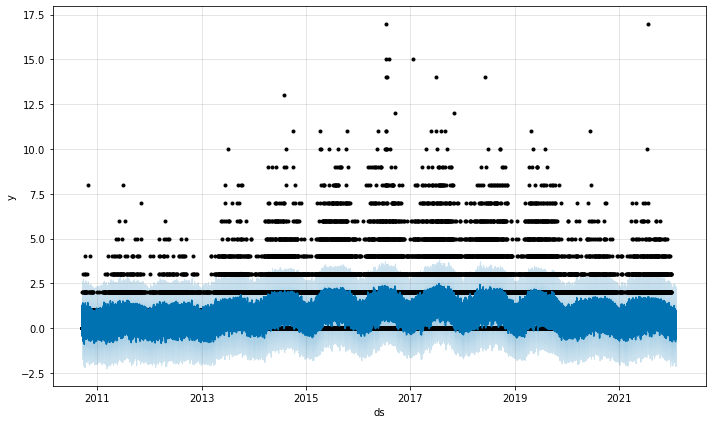

In [13]:
fig = model.plot(forecast)

In [14]:
def model_score_lower_upper(forecast, real_data, upper_value):
    score = 0

    for i in range(0,real_data.shape[0]):
        print("--------------------")
        print("Real --> {}".format(real_data.iloc[i].y))
        print("Lower", forecast.iloc[forecast.shape[0] - (real_data.shape[0]-i)].yhat_lower)
        print("Upper", forecast.iloc[forecast.shape[0] - (real_data.shape[0]-i)].yhat_upper)
        if(forecast.iloc[forecast.shape[0] - (real_data.shape[0]-i)].yhat_lower <= real_data.iloc[i].y):
            score += 1 - upper_value
        if(forecast.iloc[forecast.shape[0] - (real_data.shape[0]-i)].yhat_upper >= real_data.iloc[i].y):
            score += upper_value
        i += 1
    score = score / real_data.shape[0]
    return score

In [15]:
score_upper_lower = model_score_lower_upper(forecast, df_test, 0.5)
print("La puntuacion del modelo teniendo en cuenta el Upper y el Lower es de = ", score_upper_lower)
print("Estas son las predicciones realizadas por el modelo:")
print(forecast[['ds', 'yhat_lower', 'yhat_upper']].tail(120))

--------------------
Real --> 0
Lower -1.4052075007727356
Upper 0.9652068985985183
--------------------
Real --> 0
Lower -1.405887638964409
Upper 1.133703834931556
--------------------
Real --> 0
Lower -1.5150971176576036
Upper 1.0530323708661824
--------------------
Real --> 0
Lower -1.67048275699336
Upper 0.868796966191995
--------------------
Real --> 0
Lower -1.7014507695319194
Upper 0.8476475913495662
--------------------
Real --> 0
Lower -1.4963747681234687
Upper 0.9703875379820037
--------------------
Real --> 0
Lower -1.5132146689455663
Upper 0.8678716126342552
--------------------
Real --> 0
Lower -1.255776858437015
Upper 1.2039503290095612
--------------------
Real --> 1
Lower -1.1142686787520169
Upper 1.4069918640030932
--------------------
Real --> 0
Lower -1.2673451689571424
Upper 1.3392048616773762
--------------------
Real --> 0
Lower -1.2108913733256128
Upper 1.208653208172822
--------------------
Real --> 0
Lower -1.1621931486996364
Upper 1.1903141791150573
-----------

Lower -1.1065399680144221
Upper 1.2804824359411595
--------------------
Real --> 0
Lower -0.8824504894355427
Upper 1.631592752174875
--------------------
Real --> 0
Lower -0.5682573595934189
Upper 1.8731852821584238
--------------------
Real --> 1
Lower -0.3838119351603717
Upper 2.126697649211246
--------------------
Real --> 1
Lower -0.33383730157511493
Upper 2.351900999106716
--------------------
Real --> 1
Lower -0.2810780256595588
Upper 2.1728568993872552
--------------------
Real --> 0
Lower -0.4740304929011806
Upper 2.0321580815246136
--------------------
Real --> 0
Lower -0.8438791829035875
Upper 1.5877756509279284
--------------------
Real --> 0
Lower -1.2713441772713037
Upper 1.2329879692234254
--------------------
Real --> 0
Lower -1.3866084443723234
Upper 1.1193629225512034
--------------------
Real --> 0
Lower -1.4611218445417935
Upper 1.0496393409659996
--------------------
Real --> 0
Lower -1.3692618117039443
Upper 1.02908498749912
--------------------
Real --> 0
Lower -1

Upper 2.417329946263164
--------------------
Real --> 1
Lower -0.28294504960085376
Upper 2.2439423984975035
--------------------
Real --> 0
Lower -0.6730097922820756
Upper 1.871587225597727
--------------------
Real --> 0
Lower -1.0192958683047018
Upper 1.5138724340258658
--------------------
Real --> 0
Lower -1.148263733193161
Upper 1.1800614882466913
--------------------
Real --> 0
Lower -1.2163502751723723
Upper 1.2879848279385921
--------------------
Real --> 0
Lower -1.3255033661998292
Upper 1.2544321191829224
--------------------
Real --> 0
Lower -1.5854787801950414
Upper 0.869036383382296
--------------------
Real --> 0
Lower -1.7116981737999395
Upper 0.7896283829737109
--------------------
Real --> 0
Lower -1.7524387958060428
Upper 0.7843534814887521
--------------------
Real --> 0
Lower -1.5931954978084004
Upper 0.8550942186502803
--------------------
Real --> 0
Lower -1.453286282785421
Upper 1.1349671710868
--------------------
Real --> 0
Lower -1.2677258321368763
Upper 1.234

Lower -1.6729969892160574
Upper 0.845005176523279
--------------------
Real --> 0
Lower -1.7020174093605138
Upper 0.7772698597790009
--------------------
Real --> 0
Lower -1.8371722807928252
Upper 0.673071873181442
--------------------
Real --> 0
Lower -1.9188312567117052
Upper 0.6946122053099607
--------------------
Real --> 0
Lower -2.113210396910864
Upper 0.5540932457001655
--------------------
Real --> 0
Lower -1.950295542542235
Upper 0.6209968460884182
--------------------
Real --> 0
Lower -1.7693138600979101
Upper 0.617107035768042
--------------------
Real --> 0
Lower -1.5899242112283505
Upper 1.0006922051051295
--------------------
Real --> 0
Lower -1.398556994137948
Upper 1.0685477000153478
--------------------
Real --> 0
Lower -1.1927956924488508
Upper 1.310162109996815
--------------------
Real --> 0
Lower -1.1947695604437878
Upper 1.3607426396050606
--------------------
Real --> 0
Lower -1.2496268720564372
Upper 1.3236758583581174
--------------------
Real --> 0
Lower -1.32

In [16]:
def model_score_yhat(forecast, real_data, errorPermission):
    score = 0

    for i in range(0,real_data.shape[0]):
        print("--------------------")
        print("Real --> {}, Yhat --> {}".format(real_data.iloc[i].y, forecast.iloc[forecast.shape[0] - (real_data.shape[0]-i)].yhat))
        if((forecast.iloc[forecast.shape[0] - (real_data.shape[0]-i)].yhat*(1+errorPermission) >= real_data.iloc[i].y) & (forecast.iloc[forecast.shape[0] - (real_data.shape[0]-i)].yhat*(1-errorPermission) <= real_data.iloc[i].y)):
            score += 1
        i += 1
    score = score / real_data.shape[0]
    return score

In [17]:
ERROR = 3
score_yhat = model_score_yhat(forecast, df_test, ERROR)
print("La puntuacion del modelo teniendo en cuenta el yhat con un marjen de error de {} es de = {}".format(ERROR,score_yhat))
print("Estas son las predicciones realizadas por el modelo:")
print(forecast[['ds', 'yhat']].tail(120))

--------------------
Real --> 0, Yhat --> -0.18155061206790146
--------------------
Real --> 0, Yhat --> -0.19215962095881262
--------------------
Real --> 0, Yhat --> -0.29742149963612674
--------------------
Real --> 0, Yhat --> -0.37292696833212063
--------------------
Real --> 0, Yhat --> -0.46633496259324364
--------------------
Real --> 0, Yhat --> -0.38515583296619754
--------------------
Real --> 0, Yhat --> -0.25190010667335505
--------------------
Real --> 0, Yhat --> -0.08276416873898201
--------------------
Real --> 1, Yhat --> 0.11952337518052586
--------------------
Real --> 0, Yhat --> 0.06450136043671179
--------------------
Real --> 0, Yhat --> 0.052370210464395384
--------------------
Real --> 0, Yhat --> 0.008616906634481059
--------------------
Real --> 0, Yhat --> -0.052078969042123224
--------------------
Real --> 0, Yhat --> -0.12597447739194878
--------------------
Real --> 0, Yhat --> -0.1148614995069902
--------------------
Real --> 0, Yhat --> -0.002014519837

--------------------
Real --> 1, Yhat --> 0.8925554929841137
--------------------
Real --> 0, Yhat --> 1.0522020205390654
--------------------
Real --> 0, Yhat --> 0.9960936919369947
--------------------
Real --> 0, Yhat --> 0.7086984288824416
--------------------
Real --> 1, Yhat --> 0.3516206747673585
--------------------
Real --> 0, Yhat --> 0.021506294568569173
--------------------
Real --> 0, Yhat --> -0.17127912185400107
--------------------
Real --> 0, Yhat --> -0.21799679120683385
--------------------
Real --> 0, Yhat --> -0.22916868663360423
--------------------
Real --> 0, Yhat --> -0.2764146930600753
--------------------
Real --> 0, Yhat --> -0.3740001345381698
--------------------
Real --> 0, Yhat --> -0.46168879234392074
--------------------
Real --> 0, Yhat --> -0.42601277745771565
--------------------
Real --> 0, Yhat --> -0.3086132783330585
--------------------
Real --> 0, Yhat --> -0.11186173299918001
--------------------
Real --> 0, Yhat --> 0.0369992953810897
-------

--------------------
Real --> 0, Yhat --> -0.4158070822525564
--------------------
Real --> 0, Yhat --> -0.33858004403443426
--------------------
Real --> 0, Yhat --> -0.12521585446980693
--------------------
Real --> 0, Yhat --> 0.02514741005991694
--------------------
Real --> 0, Yhat --> 0.16572797992129912
--------------------
Real --> 0, Yhat --> 0.1885990539005658
--------------------
Real --> 0, Yhat --> 0.21162966912571554
--------------------
Real --> 1, Yhat --> 0.19094364493114685
--------------------
Real --> 0, Yhat --> 0.13091333067690236
--------------------
Real --> 0, Yhat --> 0.16982575144775205
--------------------
Real --> 0, Yhat --> 0.21222041330501126
--------------------
Real --> 0, Yhat --> 0.4100566966806301
--------------------
Real --> 0, Yhat --> 0.6117566966456801
--------------------
Real --> 0, Yhat --> 0.6949527734363292
--------------------
Real --> 1, Yhat --> 0.6749650677446162
--------------------
Real --> 1, Yhat --> 0.42019842502863697
-----------

### Cross-Validation

In [25]:
starttime = time.time()
df_cv = cross_validation(model, initial='3400 days', period='365 days', horizon = '2 days', parallel="processes")
print(f'Time: {time.time() - starttime}')
df_cv.head(10)

INFO:prophet:Making 2 forecasts with cutoffs between 2020-12-29 23:00:00 and 2021-12-29 23:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000215F5A69820>


Time: 429.8623332977295


ds      yhat  yhat_lower  yhat_upper  y              cutoff
0 2020-12-30 00:00:00 -0.487551   -1.776769    0.736079  0 2020-12-29 23:00:00
1 2020-12-30 01:00:00 -0.539606   -1.747583    0.697284  0 2020-12-29 23:00:00
2 2020-12-30 02:00:00 -0.604244   -1.889690    0.587103  0 2020-12-29 23:00:00
3 2020-12-30 03:00:00 -0.735765   -2.009770    0.593638  0 2020-12-29 23:00:00
4 2020-12-30 04:00:00 -0.678604   -1.875004    0.554368  0 2020-12-29 23:00:00
5 2020-12-30 05:00:00 -0.539025   -1.831460    0.814760  0 2020-12-29 23:00:00
6 2020-12-30 06:00:00 -0.311572   -1.581733    0.892221  0 2020-12-29 23:00:00
7 2020-12-30 07:00:00 -0.185420   -1.580636    0.966790  0 2020-12-29 23:00:00
8 2020-12-30 08:00:00 -0.051287   -1.299062    1.163319  0 2020-12-29 23:00:00
9 2020-12-30 09:00:00 -0.012114   -1.264602    1.244124  0 2020-12-29 23:00:00

In [28]:
df_p = performance_metrics(df_cv)
df_p.head()

INFO:prophet:Skipping MAPE because y close to 0


horizon       mse      rmse       mae  mdape  smape  coverage
0 0 days 05:00:00  0.358157  0.598462  0.591823    inf    2.0       1.0
1 0 days 06:00:00  0.364056  0.603370  0.598003    inf    2.0       1.0
2 0 days 07:00:00  0.314644  0.560932  0.539336    inf    2.0       1.0
3 0 days 08:00:00  0.225807  0.475191  0.426630    inf    2.0       1.0
4 0 days 09:00:00  0.129075  0.359270  0.301714    inf    2.0       1.0

In [29]:
df_p.tail()

horizon       mse      rmse       mae  mdape     smape  coverage
39 1 days 20:00:00  0.817113  0.903943  0.776974    inf  1.737580  0.944444
40 1 days 21:00:00  0.407293  0.638195  0.572014    inf  1.820888  1.000000
41 1 days 22:00:00  0.283641  0.532580  0.436715    inf  1.820888  1.000000
42 1 days 23:00:00  0.160281  0.400351  0.336006    inf  1.820888  1.000000
43 2 days 00:00:00  0.094275  0.307042  0.273206    inf  1.910444  1.000000

In [34]:
print(df_p['mse'].values.mean())

0.38922360493736563


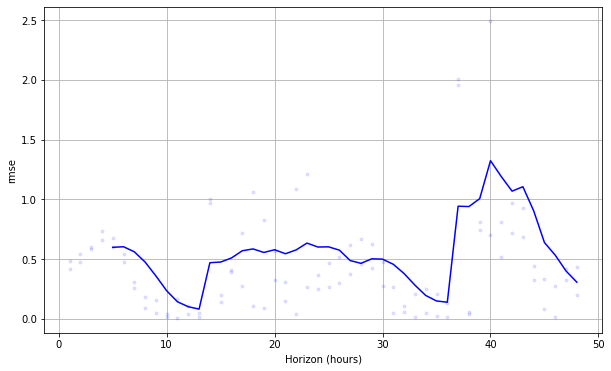

In [35]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

### Hyperparameter-Tunning

In [7]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 0.5, 1, 3, 10],
    'holidays_prior_scale': [0.01, 0.1, 0.5, 1, 3, 10],
    'seasonality_mode': ['additive', 'multiplicative'],
}

param_grid = {  
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1, 3, 10],
    'seasonality_mode': ['additive', 'multiplicative'],
}


# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mses, rmses, maes, smapes, coverages = [], [], [], [], []


def cross_val_thread(i, params, totalParams):
    print("INICIO Iteracion Nº {}/{}".format(i, totalParams))
    starttime = time.time()
    model = Prophet(**params)
    for columName in df_future:  
        if columName != 'ds': model.add_regressor(columName)
    model.fit(df_train)
            
    df_cv = cross_validation(model, initial='3400 days', period='365 days', horizon = '2 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    mses.append(df_p['mse'].values.mean())
    rmses.append(df_p['rmse'].values.mean())
    maes.append(df_p['mae'].values.mean())
    smapes.append(df_p['smape'].values.mean())
    coverages.append(df_p['coverage'].values.mean())
    print("FIN Iteracion Nº {}/{} en {} segundos".format(i, totalParams, time.time()-starttime))

# Use cross validation to evaluate all parameters
threads = []
for i, params in enumerate(all_params):
    t = threading.Thread(target=cross_val_thread, args=(i,params,len(all_params)))
    t.start() 

for i in range(0, len(all_params), 3):
    t1 = threading.Thread(target=cross_val_thread, args=(i,all_params[i],len(all_params)))
    t2 = threading.Thread(target=cross_val_thread, args=(i,all_params[i+1],len(all_params)))
    t3 = threading.Thread(target=cross_val_thread, args=(i,all_params[i+2],len(all_params)))
    threads.append(t1)
    threads.append(t2)
    threads.append(t3)
    t1.start()
    t2.start()
    t3.start()
    for t in threads:
        t.join()

print("Proceso terminado")
# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['mse'] = mses
tuning_results['rmse'] = rmses
tuning_results['mae'] = maes
tuning_results['smape'] = smapes
tuning_results['coverage'] = coverages

print(tuning_results)

INICIO Iteracion Nº 0/30
INICIO Iteracion Nº 1/30
INICIO Iteracion Nº 2/30
INICIO Iteracion Nº 3/30
INICIO Iteracion Nº 4/30
INICIO Iteracion Nº 5/30
INICIO Iteracion Nº 6/30
INICIO Iteracion Nº 7/30
INICIO Iteracion Nº 8/30
INICIO Iteracion Nº 9/30
INICIO Iteracion Nº 10/30
INICIO Iteracion Nº 11/30
INICIO Iteracion Nº 12/30INICIO Iteracion Nº 13/30
INICIO Iteracion Nº 14/30

INICIO Iteracion Nº 15/30
INICIO Iteracion Nº 16/30
INICIO Iteracion Nº 17/30
INICIO Iteracion Nº 18/30
INICIO Iteracion Nº 19/30
INICIO Iteracion Nº 20/30
INICIO Iteracion Nº 21/30
INICIO Iteracion Nº 22/30
INICIO Iteracion Nº 23/30INICIO Iteracion Nº 24/30

INICIO Iteracion Nº 25/30
INICIO Iteracion Nº 26/30
INICIO Iteracion Nº 27/30INICIO Iteracion Nº 28/30

INICIO Iteracion Nº 29/30


TypeError: list.append() takes exactly one argument (3 given)